In [1]:
# import needed libraries 
import nltk
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup as BS 
import requests 
import csv
import re
import seaborn as sns 
from keras.preprocessing.text import Tokenizer, one_hot 
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP


Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

Scrape scripts from IMSDB using Beautiful Soup

In [2]:
prometheus_url = 'https://www.imsdb.com/scripts/Prometheus.html'
inception_url = 'https://www.imsdb.com/scripts/Inception.html'                    
wow_url = 'https://www.imsdb.com/scripts/Wolf-of-Wall-Street,-The.html'                   
avatar_url = 'https://www.imsdb.com/scripts/Avatar.html' 
help_url =  'https://www.imsdb.com/scripts/Help,-The.html'

In [3]:
def pull_requests(page):
#scrapes a website using beautiful soup    
    source = requests.get(page).text
    soup = BS(source,'html.parser')
    return soup
 
    
pro_req = pull_requests(prometheus_url)
incept_req = pull_requests(inception_url)
wow_req = pull_requests(wow_url)
avatar_req = pull_requests(avatar_url)
help_req = pull_requests(help_url)
#req = bulk_requests(film_scripts_url)
#req


Clean scripts and prepare them for modeling.

In [4]:
pro_script = pro_req.find('td', class_= 'scrtext')
incept_script = incept_req.find('td', class_= 'scrtext')
wow_script = wow_req.find('td', class_= 'scrtext')
avatar_script = avatar_req.find('td', class_= 'scrtext')
help_script = help_req.find('td', class_= 'scrtext')
print('done')
help_script

done


<td class="scrtext">
<pre>

 
<b>                                 THE HELP
</b>
                         


                                Written by

                               Tate Taylor                     

                         

                         
                           Based on the novel by
           
                             Kathryn Stockett

                         

                         

                         

                         
                                                      Second Draft,
                                                  November 9, 2009

          WILLIAM FAULKNER wrote of Mammy Callie after her death:

                         
          "...she gave to my family a fidelity without stint or
          calculation or recompense and gave to my childhood an
          immeasurable devotion and love".

<b>          JACKSON, MISSISSIPPI 1963
</b>
                         

<b>          INT. AIBILEEN'S HOUSE - KITCHE

In [5]:
#pull the text out of the script 
    
pro_script = pro_script.get_text()
incept_script = incept_script.get_text()
wow_script = wow_script.get_text()
avatar_script = avatar_script.get_text()
help_script = help_script.get_text()

#for te in to_string_scripts:
#    te = turn_to_string(te)
#    print( te)
avatar_script

'\n           \n          \n          \n                                        AVATAR\n          \n          \n          \n          \n                                      Written by\n          \n                                    James Cameron\n          \n          \n          \n          \n          \n          THE SOUND OF DRUMS, from a great distance, growing louder.\n          \n          FADE IN:\n          \n          WE ARE FLYING through mist, a dimly glimpsed forest below.\n          \n                               VOICE (V.O.)\n                     When I was lying there in the VA\n                     hospital, with a big hole blown through\n                     the middle of my life, I started having\n                     these dreams of flying.\n          \n          We are very low over the forest now, gliding fast, the drums\n          BUILDING to a PEAK --\n          \n                               VOICE (V.O.)\n                     Sooner or later though, you al

In [6]:
#remove leading spaces from the scripts
c_pro_script = re.sub(r'\s+', ' ', pro_script) 
c_incept_script = re.sub(r'\s+', ' ', incept_script) 
c_wow_script = re.sub(r'\s+', ' ', wow_script) 
c_avatar_script = re.sub(r'\s+', ' ', avatar_script)
c_help_script =re.sub(r'\s+', ' ', help_script) 
#c_all_scripts = c_pro_script+c_incept_script+c_wow_script+c_avatar_script+c_help_script
#c_all_scripts = c_all_scripts.lower()
#c_all_scripts
#= re.sub(r'\s+', ' ', scripts)  
#= re.match(r"[a-zA-z]+", scripts)
c_help_script

' THE HELP Written by Tate Taylor Based on the novel by Kathryn Stockett Second Draft, November 9, 2009 WILLIAM FAULKNER wrote of Mammy Callie after her death: "...she gave to my family a fidelity without stint or calculation or recompense and gave to my childhood an immeasurable devotion and love". JACKSON, MISSISSIPPI 1963 INT. AIBILEEN\'S HOUSE - KITCHEN - NIGHT AIBILEEN, black, 53, sits at a table in a small, green kitchen. She wears a yellow dress with black piping and grips a tattered spiral notebook. Although cracked, the window behind her is crystal clear. Three framed portraits hang on the wall above her: John F. Kennedy, Dr. Martin Luther King, Jr. and an UNKNOWN YOUNG BLACK MALE wearing thick glasses. Aibileen swallows hard. AIBILEEN I was...born in 1911...on Piedmont Plantation in Cherokee County. An UNSEEN WOMAN interviews Aibileen. WOMAN (O.C.) Did you know as a girl, growing up, that one day you\'d be a maid? AIBILEEN Yes, ma\'am. I did. WOMAN (O.C.) And you knew that be

In [7]:
locations = []
pattern = re.compile(r'(INT|EXT).\s([A-Z]\w*.?\w?\s)?([A-Z]?\w*)?([A-Z]?\w*)?(\s.\s)([A-Z]?\w*)?([A-Z]?\w*)?([A-Z]?\w*)?(\s.\s)([A-Z]?\w*.?\w?\s)?([A-Z][A-Z]?\w*.?\w?\s)?([A-Z][A-Z]\w*.?\w?\s)?')
#pattern = re.compile(r'INT(([^\s]+)).\s*-.\s*([^-]+).\s*([^(a-z)]+)')
matches = pattern.finditer(c_help_script)
for match in matches:
    locations.append(match.group(0))
locations

["INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILEEN, ",
 'INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILLY ',
 'INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER ',
 'INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibileen ',
 'EXT. FOOTE ESTATE - BACKYARD - SAME DAY ',
 'INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY ',
 'INT. PHELAN PLANTATION - KITCHEN - MOMENTS LATER ',
 'INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY ',
 'INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Raleigh ',
 'INT. HOLBROOK HOUSE - DEN - LATER THAT DAY ',
 'INT. HOLBROOK HOUSE - BATHROOM - SECONDS LATER ',
 "INT. AIBILEEN'S HOME - KITCHEN - NIGHT Aibileen ",
 "INT. MINNY'S HOUSE - HALLWAY - MOMENTS LATER MINNY ",
 "INT. AIBILEEN'S HOUSE - KITCHEN - CONTINUOUS Aibileen ",
 "INT. AIBILEEN'S HOUSE - KITCHEN - MOMENTS LATER ",
 "INT. AIBILEEN'S HOUSE - KITCHEN - MOMENTS LATER AIBILEEN ",
 "INT. MINNY'S HOUSE - KITCHEN - MORNING Minny ",
 'INT. FOOTE ESTATE - KITCHEN - MOMENTS LATER ',
 'INT. FOOTE ESTATE - KITCHEN - SECONDS LATER ',
 "IN

In [8]:
locations_df = pd.DataFrame(locations, columns=['location'])
locations_df

,location
0,INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILE...
1,INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILLY
2,INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER
3,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibil...
4,EXT. FOOTE ESTATE - BACKYARD - SAME DAY
5,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY
6,INT. PHELAN PLANTATION - KITCHEN - MOMENTS LATER
7,INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY
8,INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Raleigh
9,INT. HOLBROOK HOUSE - DEN - LATER THAT DAY


In [9]:
#tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
locations_dft = locations_df 
#for location in locations_dft:
 #   tokenizer.tokenize(location)
#locations_dft

In [10]:
locations_dft = locations_dft["location"].str.split(".  | -")


In [11]:
type(locations_dft[1][1])

str

In [12]:
int_ext = []
where = []
time_of_day = []
for location in locations_dft:
    if type(location[0]) == str:
        int_ext.append(location[0])
    else:
        pass
    if type(location[1]) == str:
        where.append(location[1])
    else:
        pass
   
    try: 
        time_of_day.append(location[2])
    except IndexError:
        time_of_day.append('na')
    #int_ext.append(location[0])
    #time_of_day.append(location[2])
    #where.append(location[1])



In [13]:
locations_dft1 = pd.DataFrame({'int_ext':int_ext,'where':where,'time_of_day':time_of_day})
locations_dft1

,int_ext,where,time_of_day
0,INT. AIBILEEN'S HOUSE,KITCHEN,"NIGHT AIBILEEN,"
1,INT. HOLBROOK HOUSE,BATHROOM,SAME DAY HILLY
2,INT. LEEFOLT HOME,KITCHEN,MOMENTS LATER
3,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Aibileen
4,EXT. FOOTE ESTATE,BACKYARD,SAME DAY
5,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY
6,INT. PHELAN PLANTATION,KITCHEN,MOMENTS LATER
7,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY
8,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Raleigh
9,INT. HOLBROOK HOUSE,DEN,LATER THAT DAY


In [17]:
loc_df1 = locations_dft1
loc_df1.describe()


,int_ext,where,time_of_day
count,59,59,59
unique,12,14,28
top,INT. AIBILEEN'S HOUSE,KITCHEN,MOMENTS LATER
freq,12,35,16


In [18]:
loc_df1['int_ext'].unique()

array(["INT. AIBILEEN'S HOUSE", 'INT. HOLBROOK HOUSE',
       'INT. LEEFOLT HOME', 'EXT. FOOTE ESTATE', 'INT. PHELAN PLANTATION',
       "INT. AIBILEEN'S HOME", "INT. MINNY'S HOUSE", 'INT. FOOTE ESTATE',
       'EXT. PHELAN PLANTATION', 'EXT. LEEFOLT HOME', 'INT. BUS',
       'EXT. CHICAGO'], dtype=object)

In [64]:
scene = [(326, 376),
(6798, 6846),
(11866, 11910),
(15420, 15470),
(19522, 19562),
(21022, 21067),
(33712, 33761),
(36790, 36835),
(40229, 40278),
(40800, 40843),
(41948, 41995),
(46596, 46644),
(47623, 47674),
(47853, 47907),
(50242, 50290),
(52919, 52976),
(55747, 55792),
(57882, 57926),
(60649, 60693),
(61348, 61398),
(61849, 61900),
(64956, 65002),
(65445, 65491),
(68644, 68686),
(69833, 69880),
(70987, 71036),
(72237, 72291),
(73094, 73142),
(74251, 74298),
(85133, 85180),
(91917, 91960),
(96777, 96822),
(100109, 100153),
(100725, 100771),
(102326, 102373),
(105776, 105816),
(107366, 107411),
(107746, 107795),
(108603, 108651),
(109495, 109543),
(116975, 117026),
(119802, 119850),
(130606, 130651),
(131794, 131838),
(133814, 133865),
(134295, 134347),
(137231, 137280),
(138981, 139028),
(140158, 140205),
(145824, 145845),
(146366, 146412),
(147288, 147335),
(148434, 148486),
(150508, 150557),
(161278, 161325),
(166580, 166621),
(166973, 167010),
(167269, 167306),
(167549, 167595)]

scene_start = [376,
6846,
11910,
15470,
19562,
21067,
33761,
36835,
40278,
40843,
41995,
46644,
47674,
47907,
50290,
52976,
55792,
57926,
60693,
61398,
61900,
65002,
65491,
68686,
69880,
71036,
72291,
73142,
74298,
85180,
91960,
96822,
100153,
100771,
102373,
105816,
107411,
107795, 
108651, 
109543, 
117026, 
119850, 
130651, 
131838, 
133865, 
134347, 
137280, 
139028, 
140205,
145845, 
146412, 
147335, 
148486, 
150557, 
161325, 
166621, 
167010,
167306, 
167595]

loc_df1['scene'] = scene


In [66]:
scene_start = []
scene_end = []
for i in loc_df1['scene']:
    scene_start.append(i[1])
    scene_end.append(i[0])
scene_end

[326,
 6798,
 11866,
 15420,
 19522,
 21022,
 33712,
 36790,
 40229,
 40800,
 41948,
 46596,
 47623,
 47853,
 50242,
 52919,
 55747,
 57882,
 60649,
 61348,
 61849,
 64956,
 65445,
 68644,
 69833,
 70987,
 72237,
 73094,
 74251,
 85133,
 91917,
 96777,
 100109,
 100725,
 102326,
 105776,
 107366,
 107746,
 108603,
 109495,
 116975,
 119802,
 130606,
 131794,
 133814,
 134295,
 137231,
 138981,
 140158,
 145824,
 146366,
 147288,
 148434,
 150508,
 161278,
 166580,
 166973,
 167269,
 167549]

In [72]:
scene_end.remove(326)
scene_end.append(169129)
scene_end

[6798,
 11866,
 15420,
 19522,
 21022,
 33712,
 36790,
 40229,
 40800,
 41948,
 46596,
 47623,
 47853,
 50242,
 52919,
 55747,
 57882,
 60649,
 61348,
 61849,
 64956,
 65445,
 68644,
 69833,
 70987,
 72237,
 73094,
 74251,
 85133,
 91917,
 96777,
 100109,
 100725,
 102326,
 105776,
 107366,
 107746,
 108603,
 109495,
 116975,
 119802,
 130606,
 131794,
 133814,
 134295,
 137231,
 138981,
 140158,
 145824,
 146366,
 147288,
 148434,
 150508,
 161278,
 166580,
 166973,
 167269,
 167549,
 169129]

In [82]:
loc_df1

,int_ext,where,time_of_day,scene,scene_start,scene_end,scene_start_stop
0,INT. AIBILEEN'S HOUSE,KITCHEN,"NIGHT AIBILEEN,","(326, 376)",376,6798,376:6798
1,INT. HOLBROOK HOUSE,BATHROOM,SAME DAY HILLY,"(6798, 6846)",6846,11866,6846:11866
2,INT. LEEFOLT HOME,KITCHEN,MOMENTS LATER,"(11866, 11910)",11910,15420,11910:15420
3,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Aibileen,"(15420, 15470)",15470,19522,15470:19522
4,EXT. FOOTE ESTATE,BACKYARD,SAME DAY,"(19522, 19562)",19562,21022,19562:21022
5,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(21022, 21067)",21067,33712,21067:33712
6,INT. PHELAN PLANTATION,KITCHEN,MOMENTS LATER,"(33712, 33761)",33761,36790,33761:36790
7,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(36790, 36835)",36835,40229,36835:40229
8,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Raleigh,"(40229, 40278)",40278,40800,40278:40800
9,INT. HOLBROOK HOUSE,DEN,LATER THAT DAY,"(40800, 40843)",40843,41948,40843:41948


SyntaxError: invalid syntax (<ipython-input-108-505368f21345>, line 3)

In [109]:
loc_df1["script"] = pd.Series()
for i, row in loc_df1.iterrows():
    loc_df1.loc[i,"script"] = c_help_script[int(row["scene"][0]): int(row["scene"][1])]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/internals/blocks.py:386: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.values = np.delete(self.values, loc, 0)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/internals/blocks.py:387: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  self.mgr_locs = self.mgr_locs.delete(loc)


AssertionError: Some items were not contained in blocks

In [110]:
loc_df1

,int_ext,where,time_of_day,scene,scene_start,scene_end,scene_start_stop,script
0,INT. AIBILEEN'S HOUSE,KITCHEN,"NIGHT AIBILEEN,","(326, 376)",376,NaN,376:6798,6798
1,INT. HOLBROOK HOUSE,BATHROOM,SAME DAY HILLY,"(6798, 6846)",6846,NaN,6846:11866,11866
2,INT. LEEFOLT HOME,KITCHEN,MOMENTS LATER,"(11866, 11910)",11910,NaN,11910:15420,15420
3,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Aibileen,"(15420, 15470)",15470,NaN,15470:19522,19522
4,EXT. FOOTE ESTATE,BACKYARD,SAME DAY,"(19522, 19562)",19562,NaN,19562:21022,21022
5,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(21022, 21067)",21067,NaN,21067:33712,33712
6,INT. PHELAN PLANTATION,KITCHEN,MOMENTS LATER,"(33712, 33761)",33761,NaN,33761:36790,36790
7,INT. LEEFOLT HOME,KITCHEN,LATER THAT DAY,"(36790, 36835)",36835,NaN,36835:40229,40229
8,INT. LEEFOLT HOME,KITCHEN,CONTINUOUS Raleigh,"(40229, 40278)",40278,NaN,40278:40800,40800
9,INT. HOLBROOK HOUSE,DEN,LATER THAT DAY,"(40800, 40843)",40843,NaN,40843:41948,41948


In [101]:
for i, row in loc_df1['scene_start'], loc_df1['scene_end']:
    print(row)

ValueError: too many values to unpack (expected 2)

In [81]:
loc_df1['scene_start'],loc_df1['scene_end'] = [scene_start,scene_end]
loc_df1['scene_start_stop'] = loc_df1['scene_start'].apply(str) + ':' + loc_df1['scene_end'].apply(str)
loc_df1['scene_start_stop'] = pd.to_numeric(loc_df1['scene_start_stop'])
loc_df1

ValueError: Unable to parse string "376:6798" at position 0

In [76]:
story = []
for a in loc_df1[scene]

ValueError: too many values to unpack (expected 2)

In [27]:
aibileen_house = loc_df1[(loc_df1['int_ext'] == "INT. AIBILEEN'S HOUSE") | (loc_df1['int_ext']== "INT. AIBILEEN'S HOME")] 
leefolt_house = loc_df1[loc_df1['int_ext'] =='INT. LEEFOLT HOME']
holbrook_house = loc_df1[loc_df1['int_ext'] =='INT. HOLBROOK HOUSE']
plantation = loc_df1[loc_df1['int_ext'] =='INT. PHELAN PLANTATION']
foot_estate = loc_df1[loc_df1['int_ext']== 'INT. FOOTE ESTATE']
bus = loc_df1[loc_df1['int_ext']== 'INT. BUS']
ext_foot_estate = loc_df1[loc_df1['int_ext']==  'EXT. FOOTE ESTATE']
ext_plantation = loc_df1[loc_df1['int_ext']=='EXT. PHELAN PLANTATION']
ext_leefolt_home = loc_df1[loc_df1['int_ext']=='EXT. LEEFOLT HOME']
ext_chicago = loc_df1[loc_df1['int_ext']=='EXT. CHICAGO']
ext_chicago

,int_ext,where,time_of_day
57,EXT. CHICAGO,GRAVEYARD,DAY Close


## Word2Vec



In [37]:
for match in matchez:
    print(match)

<_sre.SRE_Match object; span=(326, 376), match="INT. AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILEEN,>
<_sre.SRE_Match object; span=(6798, 6846), match='INT. HOLBROOK HOUSE - BATHROOM - SAME DAY HILLY '>
<_sre.SRE_Match object; span=(11866, 11910), match='INT. LEEFOLT HOME - KITCHEN - MOMENTS LATER '>
<_sre.SRE_Match object; span=(15420, 15470), match='INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Aibileen>
<_sre.SRE_Match object; span=(19522, 19562), match='EXT. FOOTE ESTATE - BACKYARD - SAME DAY '>
<_sre.SRE_Match object; span=(21022, 21067), match='INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY '>
<_sre.SRE_Match object; span=(33712, 33761), match='INT. PHELAN PLANTATION - KITCHEN - MOMENTS LATER >
<_sre.SRE_Match object; span=(36790, 36835), match='INT. LEEFOLT HOME - KITCHEN - LATER THAT DAY '>
<_sre.SRE_Match object; span=(40229, 40278), match='INT. LEEFOLT HOME - KITCHEN - CONTINUOUS Raleigh >
<_sre.SRE_Match object; span=(40800, 40843), match='INT. HOLBROOK HOUSE - DEN - LATER THAT DAY '>

In [55]:
scene1_count = c_help_script[366:6798]
scene2_count
scene3_count

len(scene_1_char_count)

6432

In [9]:
import nltk 
import sklearn
import gensim
from gensim import models
from gensim import corpora, models, similarities 
from gensim.models import Word2Vec
import glob
import multiprocessing
import pprint
import re
import gensim.models.word2vec as w2v
import sklearn.manifold
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christianfreeman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christianfreeman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [120]:
#Import Tokenizer to tokenize the script
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')


In [121]:
help_raw_script = tokenizer.tokenize(c_help_script)
help_raw_script

[' THE HELP Written by Tate Taylor Based on the novel by Kathryn Stockett Second Draft, November 9, 2009 WILLIAM FAULKNER wrote of Mammy Callie after her death: "...she gave to my family a fidelity without stint or calculation or recompense and gave to my childhood an immeasurable devotion and love".',
 'JACKSON, MISSISSIPPI 1963 INT.',
 "AIBILEEN'S HOUSE - KITCHEN - NIGHT AIBILEEN, black, 53, sits at a table in a small, green kitchen.",
 'She wears a yellow dress with black piping and grips a tattered spiral notebook.',
 'Although cracked, the window behind her is crystal clear.',
 'Three framed portraits hang on the wall above her: John F. Kennedy, Dr. Martin Luther King, Jr. and an UNKNOWN YOUNG BLACK MALE wearing thick glasses.',
 'Aibileen swallows hard.',
 'AIBILEEN I was...born in 1911...on Piedmont Plantation in Cherokee County.',
 'An UNSEEN WOMAN interviews Aibileen.',
 'WOMAN (O.C.)',
 "Did you know as a girl, growing up, that one day you'd be a maid?",
 "AIBILEEN Yes, ma'am

In [12]:
a = re.findall(r'\w+(?:-\w+)+',c_help_script)
a

['Uh-huh',
 'Ninety-five',
 'seventy-two',
 'double-stick',
 'smoke-filled',
 'shit-house',
 'well-appointed',
 'tee-tee',
 'Tee-tee',
 'L-SHAPED',
 'L-SHAPED',
 'Uh-hum',
 'Long-Haul',
 'Ah-hem',
 'Ah-hem',
 '6-8-4',
 'twenty-eight',
 'Uh-hmm',
 'non-members',
 'Ah-hem',
 'hiss-whispers',
 'good-bye',
 'rusted-out',
 'auburn-colored',
 'twenty-nine',
 'strong-willed',
 'five-thirteen',
 'ninety-nine',
 'fifty-five',
 'four-year-old',
 'Pine-Sol',
 'panty-hose',
 'one-story',
 'hand-tatted',
 'twenty-four',
 'brand-spanking-new',
 'try-out',
 'sass-mouthing',
 'Coca-Cola',
 'battle-worn',
 'twelve-foot',
 'mmm-mmm',
 'Thirty-one',
 'well-tailored',
 'Coca-Cola',
 'self-conscious',
 'seventy-five',
 'good-byes',
 'self-consciously',
 'Co-cola',
 'DRIVE-IN-MOVIE',
 'six-two',
 'WLBT-TV',
 'Fifty-three',
 'fifty-four',
 'thirty-eight',
 'maroon-colored',
 'long-sleeved',
 'floor-length',
 'twenty-eight',
 'Woo-hoo',
 'Uh-oh',
 'fleur-de-lis',
 'big-boobed',
 'two-hundred',
 'wide-eyed',
 

In [14]:
def script_to_wordlist(raw):
    #cleans the text. Removes special charecters 
    clean= re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [15]:
sentences = []
for raw_script in help_raw_script:
    if len(help_raw_script)>0:
        sentences.append(script_to_wordlist(raw_script))

In [18]:
print(help_raw_script[5])
print(script_to_wordlist(raw_script[5]))

Three framed portraits hang on the wall above her: John F. Kennedy, Dr. Martin Luther King, Jr. and an UNKNOWN YOUNG BLACK MALE wearing thick glasses.
[]


In [19]:
help_token_count = sum([len(sentence) for sentence in sentences])
print(help_token_count)

30735


In [20]:
num_features = 300
min_word_count = 3
num_workers = multiprocessing.cpu_count()
context_size = 7
downsampling = 1e-3
seed=1

In [21]:
#word2vec model 
script2vec = w2v.Word2Vec(sg=1,
                          seed=seed,
                          workers=num_workers,
                         size=num_features,
                         min_count=min_word_count,
                         window=context_size,
                         sample=downsampling)

In [22]:
script2vec.build_vocab(sentences)

In [23]:
print('Word2vec vocabulary length:', len(script2vec.wv.vocab))

Word2vec vocabulary length: 1437


In [24]:
#train the model 
script2vec.train(sentences, total_examples=script2vec.corpus_count,epochs=15)

(305967, 461025)

In [25]:
import os
if not os.path.exists('trained'):
    os.makedirs('trained')

In [26]:
script2vec.save(os.path.join('trained', 'script2vec.w2v'))

In [27]:
script2vec_load = w2v.Word2Vec.load(os.path.join('trained', "script2vec.w2v"))


In [28]:
script2vec.save("script2vec.model")
script2vec.save("model.bin")

In [29]:
help_vector_matrix = script2vec.wv.syn0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


Create word embeddings 

In [30]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [36]:
help_vector_matrix_2d = tsne.fit_transform(help_vector_matrix)

In [37]:
#create a dataframe out of the matrix 
points = pd.DataFrame(
    [
        (word,coords[0], coords[1])
        for word, coords in [
            (word, help_vector_matrix_2d[script2vec.wv.vocab[word].index])
            for word in script2vec.wv.vocab
        ]
    ],

    columns=['word', 'x', 'y'])

In [38]:
points.head(10)

,word,x,y
0,THE,34.043514,15.892294
1,by,11.620222,-26.270332
2,on,12.739585,-8.569861
3,the,44.468224,-23.988930
4,WILLIAM,-19.575264,10.977399
5,wrote,-52.023533,18.392359
6,of,17.531010,-24.835787
7,after,-53.324657,6.491987
8,her,56.105793,-18.801958
9,she,-39.143219,-17.765596


In [39]:
sns.set_context("poster")

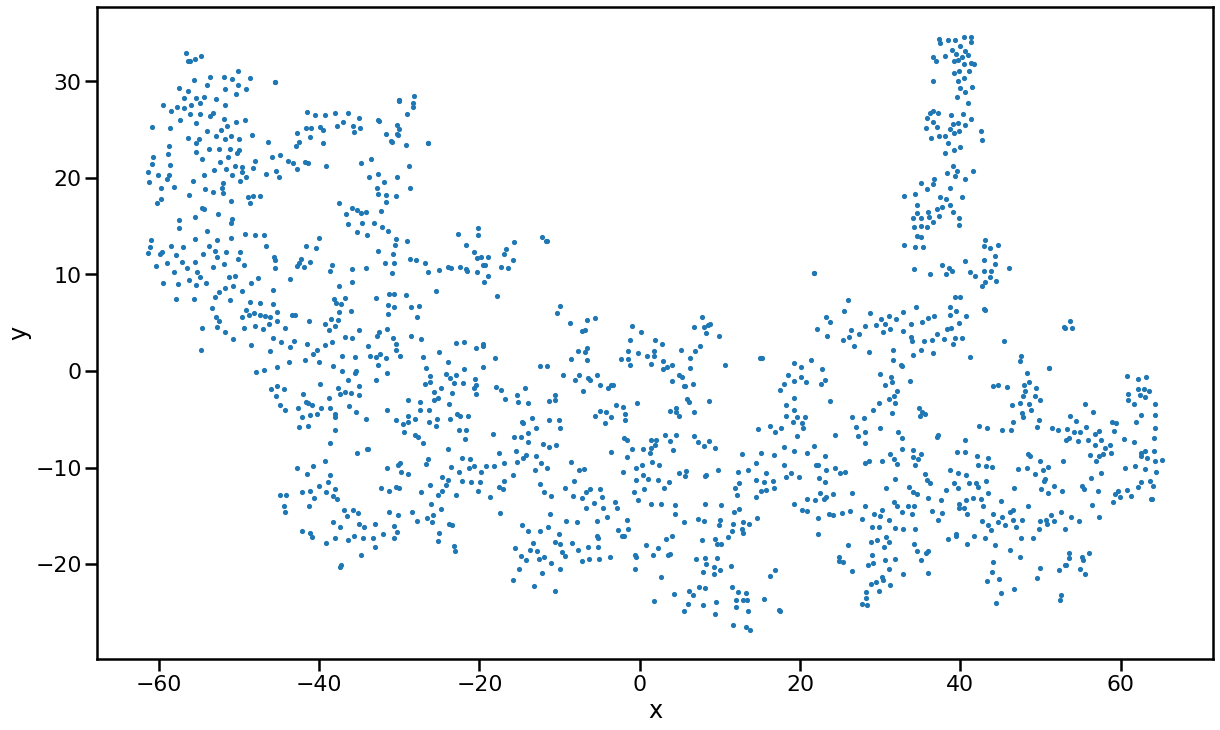

In [40]:
#plot the words to see how they cluster 
points.plot.scatter('x','y',s=10,figsize=(20,12))

In [41]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    ax = slice.plot.scatter('x', 'y', s=500, figsize=(20,10))
    #ax = slice.plot.scatter(points.x,points.y, s=10, figsize=(20, 10))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

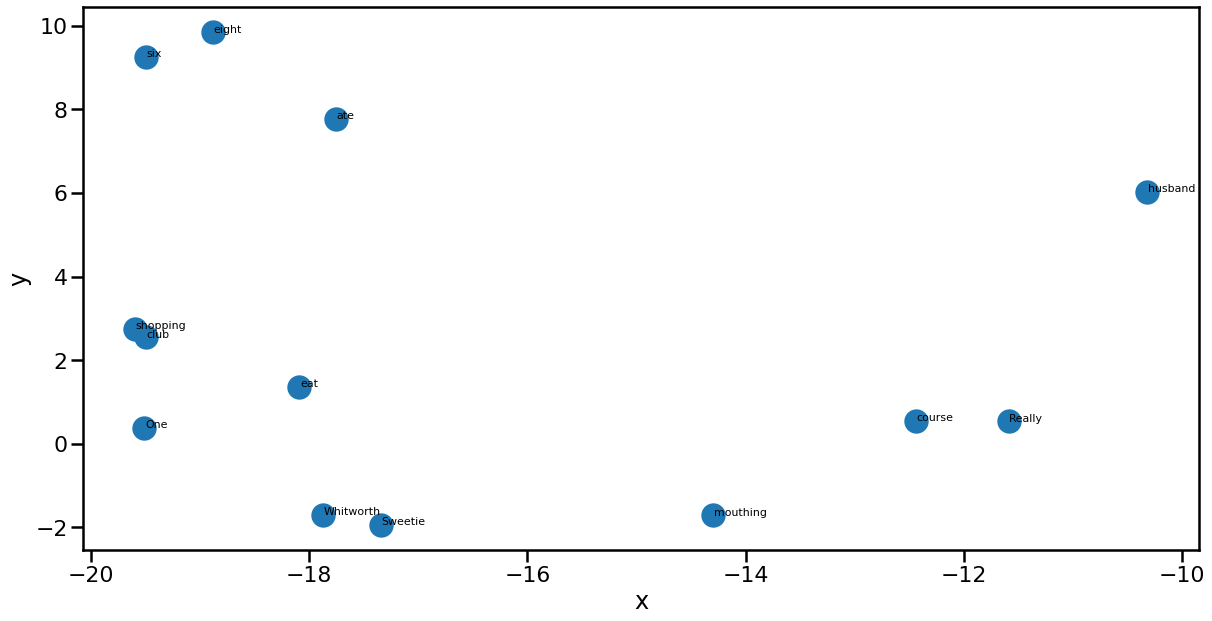

In [42]:
#loook closer into certain clusters 
plot_region(x_bounds=(-20, -10), y_bounds=(-2, 10))

In [43]:
#show most similar words
script2vec.most_similar('help')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wrote', 0.993952751159668),
 ('somebody', 0.9935554265975952),
 ('thinking', 0.9930136203765869),
 ('pay', 0.9929187893867493),
 ('take', 0.9926109910011292),
 ('need', 0.9924840331077576),
 ('might', 0.9923782348632812),
 ('cooking', 0.9922395944595337),
 ('send', 0.9922316670417786),
 ('asked', 0.9918989539146423)]

In [44]:
def nearest_similarity_cosmul(start1,end1,end2):
#finds the most smiliar words and compares them
    similarities = script2vec.wv.most_similar_cosmul(
    positive=[end2,start1],
    negative=[end1]
    )
    start2 = similarities[0][0]
    print ("{start1} is related to {end1}, as {start2} is related to {end2}.".format(**locals()))
    
    

In [48]:
nearest_similarity_cosmul('black', 'woman', 'man')

black is related to woman, as bridge is related to man.


## Gensim Summarizer 

In [49]:
from gensim.summarization.summarizer import summarize

In [50]:
c_help_script = c_help_script.lower()
print(summarize(c_help_script, ratio=.001))

leefolt home - living room - same time elizabeth and hilly cackle with a group of girls as missus walters sits on the couch watching "guiding light." skeeter suddenly rushes through the front door.
leefolt home - kitchen - later that day bridge over, skeeter smokes while watching through a window as minny arrives in hilly's car.
leefolt home - kitchen - later that day skeeter sits across the table from aibileen, reading the `miss myrna' letters.


Summarizer did not work as that well. Will try another summarization technique 

## Summarizer 


In [ ]:
script1_df

In [51]:
def script_cleaner(c_script):
    #cleans removes special characters and makes everything lowercase 
    c_script = c_script.lower()
    script = re.sub('[^a-zA-Z]', ' ', c_script)
    re.sub(r'\s+', ' ', c_script)
    return c_script 

In [52]:
def script_word_frequencies(clean_script, blank_freq_dict):
    #counts how frequent a word appears throughout the script 
    for word in nltk.word_tokenize(clean_script):
        if word not in stopwords:
            if word not in blank_freq_dict.keys():
                blank_freq_dict[word] = 1
            else:
                blank_freq_dict[word] +=1
    return blank_freq_dict

In [53]:

def frequency_score(script_word_freq_count):
    #creates a float int frequency score
    max_freq = max(script_word_freq_count.values())
    for word in script_word_freq_count.keys():
        script_word_freq_count[word] = (script_word_freq_count[word]/max_freq) 
    return script_word_freq_count

In [54]:

def sentence_score (cleaned_script, script_word_freq, script_sent_score ):
    #returns a float int score for each tokenized sentence
    script_sent_token = nltk.sent_tokenize(cleaned_script)
    blank_sent_score = {}
    for sent in script_sent_token:
        for word in nltk.word_tokenize(sent.lower()):
            if word in script_word_freq.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in blank_sent_score.keys():
                        blank_sent_score[sent] = script_word_freq[word]
                    else:
                        
                        blank_sent_score[sent] += script_word_freq[word]
    return blank_sent_score 



In [55]:
#Remove all special charecters 
c_help_no_special = re.sub('[^a-zA-Z]', ' ', c_help_script )
c_help_no_special = re.sub(r'\s+', ' ', c_help_no_special) 

In [56]:
c_help_no_special

' the help written by tate taylor based on the novel by kathryn stockett second draft november william faulkner wrote of mammy callie after her death she gave to my family a fidelity without stint or calculation or recompense and gave to my childhood an immeasurable devotion and love jackson mississippi int aibileen s house kitchen night aibileen black sits at a table in a small green kitchen she wears a yellow dress with black piping and grips a tattered spiral notebook although cracked the window behind her is crystal clear three framed portraits hang on the wall above her john f kennedy dr martin luther king jr and an unknown young black male wearing thick glasses aibileen swallows hard aibileen i was born in on piedmont plantation in cherokee county an unseen woman interviews aibileen woman o c did you know as a girl growing up that one day you d be a maid aibileen yes ma am i did woman o c and you knew that because aibileen momma was a maid my grandmother was a house slave woman c

In [57]:
#tokenize the script
help_sent_token_script = nltk.sent_tokenize(c_help_script)
stopwords = nltk.corpus.stopwords.words('english')

In [59]:
#count the frequency for each word
help_word_frequencies = {}
for word in nltk.word_tokenize(c_help_no_special):
    if word not in stopwords:
        if word not in help_word_frequencies.keys():
            help_word_frequencies[word] = 1
        else:
            help_word_frequencies[word] +=1

In [60]:
help_word_frequencies

{'help': 41,
 'written': 5,
 'tate': 2,
 'taylor': 2,
 'based': 1,
 'novel': 1,
 'kathryn': 2,
 'stockett': 2,
 'second': 5,
 'draft': 2,
 'november': 2,
 'william': 45,
 'faulkner': 1,
 'wrote': 6,
 'mammy': 3,
 'callie': 3,
 'death': 1,
 'gave': 7,
 'family': 15,
 'fidelity': 1,
 'without': 11,
 'stint': 1,
 'calculation': 1,
 'recompense': 1,
 'childhood': 1,
 'immeasurable': 1,
 'devotion': 1,
 'love': 25,
 'jackson': 34,
 'mississippi': 12,
 'int': 151,
 'aibileen': 512,
 'house': 89,
 'kitchen': 75,
 'night': 40,
 'black': 37,
 'sits': 62,
 'table': 59,
 'small': 9,
 'green': 6,
 'wears': 14,
 'yellow': 2,
 'dress': 31,
 'piping': 1,
 'grips': 2,
 'tattered': 1,
 'spiral': 1,
 'notebook': 5,
 'although': 1,
 'cracked': 3,
 'window': 19,
 'behind': 36,
 'crystal': 3,
 'clear': 1,
 'three': 17,
 'framed': 6,
 'portraits': 1,
 'hang': 6,
 'wall': 11,
 'john': 3,
 'f': 3,
 'kennedy': 4,
 'dr': 2,
 'martin': 2,
 'luther': 3,
 'king': 6,
 'jr': 4,
 'unknown': 1,
 'young': 19,
 'male': 

In [61]:
help_max_frequency = max(help_word_frequencies.values())
for word in help_word_frequencies.keys():
    help_word_frequencies[word] = (help_word_frequencies[word]/help_max_frequency) 
help_word_frequencies

{'help': 0.06156156156156156,
 'written': 0.0075075075075075074,
 'tate': 0.003003003003003003,
 'taylor': 0.003003003003003003,
 'based': 0.0015015015015015015,
 'novel': 0.0015015015015015015,
 'kathryn': 0.003003003003003003,
 'stockett': 0.003003003003003003,
 'second': 0.0075075075075075074,
 'draft': 0.003003003003003003,
 'november': 0.003003003003003003,
 'william': 0.06756756756756757,
 'faulkner': 0.0015015015015015015,
 'wrote': 0.009009009009009009,
 'mammy': 0.0045045045045045045,
 'callie': 0.0045045045045045045,
 'death': 0.0015015015015015015,
 'gave': 0.010510510510510511,
 'family': 0.02252252252252252,
 'fidelity': 0.0015015015015015015,
 'without': 0.016516516516516516,
 'stint': 0.0015015015015015015,
 'calculation': 0.0015015015015015015,
 'recompense': 0.0015015015015015015,
 'childhood': 0.0015015015015015015,
 'immeasurable': 0.0015015015015015015,
 'devotion': 0.0015015015015015015,
 'love': 0.03753753753753754,
 'jackson': 0.05105105105105105,
 'mississippi':

Wrap repeat codes into function so that I can pass a script and itll output a summary. 


In [62]:
help_sentence_score = {}
for sent in help_sent_token_script:
    for word in nltk.word_tokenize(sent.lower()):
        if word in help_word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in help_sentence_score.keys():
                    help_sentence_score[sent] = help_word_frequencies[word]
                else:
                    
                    help_sentence_score[sent] += help_word_frequencies[word]

In [63]:
help_sentence_score

{'jackson, mississippi 1963 int.': 0.2957957957957958,
 "aibileen's house - kitchen - night aibileen, black, 53, sits at a table in a small, green kitchen.": 2.2162162162162162,
 'she wears a yellow dress with black piping and grips a tattered spiral notebook.': 0.1411411411411411,
 'although cracked, the window behind her is crystal clear.': 0.09459459459459459,
 'three framed portraits hang on the wall above her: john f. kennedy, dr. martin luther king, jr. and an unknown young black male wearing thick glasses.': 0.21621621621621617,
 'aibileen swallows hard.': 1.6066066066066065,
 'aibileen i was...born in 1911...on piedmont plantation in cherokee county.': 0.8333333333333333,
 'an unseen woman interviews aibileen.': 0.8318318318318318,
 'woman (o.c.)': 0.2852852852852853,
 "did you know as a girl, growing up, that one day you'd be a maid?": 0.4159159159159159,
 "aibileen yes, ma'am.": 5.717717717717716,
 'and you knew that because?': 0.021021021021021023,
 'aibileen momma was a mai

In [64]:
import heapq

In [65]:
help_summary_sent = heapq.nlargest(7, help_sentence_score, key=help_sentence_score.get)
help_summary = ' '.join(help_summary_sent)
help_summary

"int. aibileen (v.o.) skeeter nods. aibileen yes, ma'am. int - aibileen's home - kitchen - that night aibileen, skeeter and minny sit at the table. aibileen's house - kitchen - later that night the manuscript sits before aibileen, minny and skeeter. aibileen's house - kitchen - later that night minny, skeeter and aibileen sit quietly compiling stories."

## Unsupervised Text Summarization 

Summarization using Kearas and tensorflow

In [87]:
from keras.preprocessing.text import Tokenizer, one_hot  
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from nltk.tokenize import sent_tokenize as ST

In [72]:
help_text_len = len(c_help_script)
help_text_len


169129

In [73]:
#make the script lower case
c_help_script = c_help_script.lower()
c_help_script

' the help written by tate taylor based on the novel by kathryn stockett second draft, november 9, 2009 william faulkner wrote of mammy callie after her death: "...she gave to my family a fidelity without stint or calculation or recompense and gave to my childhood an immeasurable devotion and love". jackson, mississippi 1963 int. aibileen\'s house - kitchen - night aibileen, black, 53, sits at a table in a small, green kitchen. she wears a yellow dress with black piping and grips a tattered spiral notebook. although cracked, the window behind her is crystal clear. three framed portraits hang on the wall above her: john f. kennedy, dr. martin luther king, jr. and an unknown young black male wearing thick glasses. aibileen swallows hard. aibileen i was...born in 1911...on piedmont plantation in cherokee county. an unseen woman interviews aibileen. woman (o.c.) did you know as a girl, growing up, that one day you\'d be a maid? aibileen yes, ma\'am. i did. woman (o.c.) and you knew that be

In [74]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(c_help_script)

In [75]:
import os

In [88]:
help_token = ST(c_help_script)
help_token

[' the help written by tate taylor based on the novel by kathryn stockett second draft, november 9, 2009 william faulkner wrote of mammy callie after her death: "...she gave to my family a fidelity without stint or calculation or recompense and gave to my childhood an immeasurable devotion and love".',
 'jackson, mississippi 1963 int.',
 "aibileen's house - kitchen - night aibileen, black, 53, sits at a table in a small, green kitchen.",
 'she wears a yellow dress with black piping and grips a tattered spiral notebook.',
 'although cracked, the window behind her is crystal clear.',
 'three framed portraits hang on the wall above her: john f. kennedy, dr. martin luther king, jr. and an unknown young black male wearing thick glasses.',
 'aibileen swallows hard.',
 'aibileen i was...born in 1911...on piedmont plantation in cherokee county.',
 'an unseen woman interviews aibileen.',
 'woman (o.c.)',
 "did you know as a girl, growing up, that one day you'd be a maid?",
 "aibileen yes, ma'am

In [106]:
vec_model = Word2Vec(help_token, min_count=1, size=169129)

In [107]:
n=169153
e = Embedding(169130, 32, input_length=169153)
help_one_hot = one_hot(c_help_script,n, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
type(help_one_hot)

list

In [108]:
help_one_hot

[139258,
 53684,
 127632,
 81299,
 93625,
 92807,
 6512,
 92689,
 139258,
 55817,
 81299,
 43034,
 37865,
 44830,
 158537,
 50290,
 41522,
 90984,
 83002,
 91032,
 36648,
 150413,
 97313,
 103875,
 43350,
 148456,
 114738,
 24961,
 135525,
 126231,
 131673,
 113244,
 108923,
 14186,
 131728,
 121834,
 81705,
 53652,
 81705,
 23700,
 15546,
 135525,
 126231,
 131673,
 76183,
 104914,
 156356,
 75873,
 15546,
 42839,
 1848,
 13078,
 41407,
 135528,
 121438,
 103180,
 35132,
 29135,
 130565,
 123508,
 140701,
 42779,
 125155,
 108923,
 158864,
 108966,
 108923,
 72795,
 2968,
 35132,
 24961,
 159122,
 108923,
 114368,
 10179,
 136571,
 123508,
 51558,
 15546,
 89514,
 108923,
 32421,
 164974,
 129655,
 31792,
 131950,
 139258,
 84204,
 83181,
 148456,
 33409,
 59130,
 117229,
 138802,
 139502,
 159708,
 5967,
 92689,
 139258,
 47591,
 127782,
 148456,
 125990,
 11796,
 59659,
 46590,
 29578,
 35526,
 40552,
 85146,
 15546,
 104914,
 40919,
 41246,
 123508,
 149624,
 156051,
 58232,
 99812

In [118]:
help_1_hot_pad = [str(i).rjust(6, '0') for i in help_one_hot]
help_1_hot_pad = help_1_hot_pad

In [124]:
help_1_hot_pad

['139258',
 '053684',
 '127632',
 '081299',
 '093625',
 '092807',
 '006512',
 '092689',
 '139258',
 '055817',
 '081299',
 '043034',
 '037865',
 '044830',
 '158537',
 '050290',
 '041522',
 '090984',
 '083002',
 '091032',
 '036648',
 '150413',
 '097313',
 '103875',
 '043350',
 '148456',
 '114738',
 '024961',
 '135525',
 '126231',
 '131673',
 '113244',
 '108923',
 '014186',
 '131728',
 '121834',
 '081705',
 '053652',
 '081705',
 '023700',
 '015546',
 '135525',
 '126231',
 '131673',
 '076183',
 '104914',
 '156356',
 '075873',
 '015546',
 '042839',
 '001848',
 '013078',
 '041407',
 '135528',
 '121438',
 '103180',
 '035132',
 '029135',
 '130565',
 '123508',
 '140701',
 '042779',
 '125155',
 '108923',
 '158864',
 '108966',
 '108923',
 '072795',
 '002968',
 '035132',
 '024961',
 '159122',
 '108923',
 '114368',
 '010179',
 '136571',
 '123508',
 '051558',
 '015546',
 '089514',
 '108923',
 '032421',
 '164974',
 '129655',
 '031792',
 '131950',
 '139258',
 '084204',
 '083181',
 '148456',
 '033409',

In [126]:
help_1hot_pad_len = len(help_1_hot_pad)
help_1hot_pad_len


29633

In [ ]:
help_voc_size = len(tokenizer.word_index)+1

In [ ]:
import _pickle as cPickle
from collections import counter 
import postprocessing as pr 

In [ ]:
from keras import backend as K 
K.clear_session()
latent_dim = 500

In [ ]:
#encoder 
encoder_inputs = Input(shape=(help_text_len,))
enc_emb = Embedding(help_voc_size, latent_dim,trainable=True)
#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 


In [ ]:





#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(help_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 



In [ ]:
#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

In [ ]:
print('Prometheus script length:', len(c_pro_script))
print('Inception script length:', len(c_incept_script))
print('Wolf on Wallstreet script length:', len(c_wow_script))
print('Avatar script length:', len(c_avatar_script))
print('The Help script length:', len(c_help_script))

In [ ]:
df2 = df1.assign(script_len = [len(c_pro_script),len(c_incept_script),len(c_wow_script),len(c_avatar_script),len(c_help_script)])
#df2 = df1.assign(script = [])

In [ ]:
scripts_df = pd.DataFrame()
scripts_df = scripts_df.assign(script = [c_pro_script, c_incept_script, c_wow_script, c_avatar_script, c_help_script] )
scripts_df

In [ ]:
c_pro_script = c_pro_script.lower() 
c_incept_script = c_incept_script.lower()
c_wow_script = c_wow_script.lower()
c_avatar_script = c_avatar_script.lower()
c_help_script = c_help_script.lower()

c_pro_script    

In [ ]:
import nltk
import string 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize as ST
from gensim.summarization.summarizer import summarize

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

pro_token = tokenizer.tokenize(c_pro_script)
incept_token = tokenizer.tokenize(c_incept_script)
wow_token = tokenizer.tokenize(c_wow_script)
avatar_token = tokenizer.tokenize(c_avatar_script)
help_token1 = ST(c_help_script)
help_token1

In [ ]:
help_token1_stop = []
for s in help_token1:
    
    
        #help_token1_stop = remove_stop(t)
#print(help_token1_stop)

In [ ]:
def remove_stop(text):
    token_stop = [s for s in text if s not in stopwords.words('english')]
    return token_stop
pro_stop = remove_stop(pro_token)
incept_stop = remove_stop(incept_token)
wow_stop = remove_stop(wow_token)
avatar_stop= remove_stop(avatar_token)
help_stop = remove_stop(help_token) 
help_token1_stop = remove_stop(help_token1)
help_token1_stop

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer as TWD
help_stop_de = TWD().detokenize(help_stop)

help_stop_de

In [ ]:
help_token1 = str(help_token1)
help_summary1 = summarize(help_token1)



In [ ]:
help_summary2 = summarize(help_summary1)
help_summary2

In [ ]:

#from attention import AttentionLayer

In [ ]:

! easy_install textteaser
from textteaser import TextTeaser
tt = TextTeaser()
#tt.summarize('pro',c_pro_script )

In [ ]:
token_count = nltk.FreqDist(script_token)
token_count


In [ ]:
nlp = spacy.load('en')
script_spacy = nlp(script)
len(script_spacy)

In [ ]:
script_spacy = script_spacy[1:24434]
len(script_spacy)

In [ ]:
script_not_stop = remove_stop(script_token)
script_not_stop


In [ ]:
stop_list = [pro_stop, incept_stop, wow_stop, avatar_stop, help_stop]


for plt in stop_list:
    token_plot = nltk.FreqDist(plt)
    token_plot.plot(20,cumulative = False)



In [ ]:
pro_token_count = nltk.FreqDist(pro_stop)
token_count.plot(30,cumulative = False)

In [ ]:
incept_token_count = nltk.FreqDist(incept_stop)
incept_token_count.plot(30,cumulative = False)

In [ ]:
lemmatizer = WordNetLemmatizer()

def word_lemma(text):
    lem_script = [lemmatizer.lemmatize(i) for i in text]
    return lem_script

In [ ]:
hallow_lemma = word_lemma(script_not_stop)
hallow_lemma